# Run  dem_parameters

#### This notebook resamples the DEM to the model grid and stores cell DEM attributes in hru_params.shp.

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

In [4]:
# Set problem specific variable values for scripts
dem_orig_path = "..\examples\sagehen\dem\imgn40w121_13_filled.img"
dem_units = "meters"
dem_projection_method = "BILINEAR"
dem_cellsize = 10
calc_flow_acc_dem_flag = True
# flow_acc_dem_factor = 0.001
dem_adj_copy_field = "DEM_FLOWAC"
reset_dem_adj_flag = False

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','dem_orig_path',dem_orig_path)
Config.set('INPUTS','dem_units',dem_units)
Config.set('INPUTS','dem_projection_method',dem_projection_method)
Config.set('INPUTS','dem_cellsize',dem_cellsize)
Config.set('INPUTS','calc_flow_acc_dem_flag',calc_flow_acc_dem_flag)
#Config.set('INPUTS','flow_acc_dem_factor',flow_acc_dem_factor)
Config.set('INPUTS','dem_adj_copy_field',dem_adj_copy_field)
Config.set('INPUTS','reset_dem_adj_flag',reset_dem_adj_flag)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArcpy script dem_parameters.

In [6]:
# Set and run dem_parameters script
script = r"dem_parameters.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

#### The dem_parameters script populates cell altitude statistics in hru_params.shp. The table below shows the first 10 rows. Note that some variables in the hru_params table have not been give a value yet.

In [7]:
fn1=r"..\examples\sagehen\hru_params\hru_params.shp"
table=geopandas.read_file(fn1)
table.head(10)

,ORIG_FID,HRU_ID,HRU_TYPE,DEM_MEAN,DEM_MIN,DEM_MAX,DEM_ADJ,DEM_FLOWAC,DEM_SUM,DEM_COUNT,...,PPT_RT_04,PPT_RT_05,PPT_RT_06,PPT_RT_07,PPT_RT_08,PPT_RT_09,PPT_RT_10,PPT_RT_11,PPT_RT_12,geometry
0,0,6385,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214109.9999999997 4366620, 214109.99..."
1,1,6386,0,2155.573934,2148.798096,2162.991943,2153.812295,2153.812295,3.709343e+04,17.222222,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214199.9999999998 4366620.000000001,..."
2,2,6387,0,2154.183817,2148.162109,2162.430908,2155.115054,2155.115054,5.653489e+07,26232.888984,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214289.9999999992 4366619.999999999,..."
3,3,6388,0,2156.385956,2146.514893,2169.937500,2156.319658,2156.319658,3.623336e+06,1680.333338,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214380.0000000002 4366620, 214380 43..."
4,4,6389,0,2155.930990,2138.800049,2171.084473,2157.961997,2157.961997,4.590705e+06,2127.333342,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214470.0000000004 4366620, 214470.00..."
5,5,6390,0,2152.734176,2134.806396,2172.362549,2151.681130,2151.681130,1.676303e+07,7790.666620,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214560.0000000001 4366620, 214560.00..."
6,6,6391,0,2154.347614,2137.448242,2172.604248,2157.943925,2157.943925,2.145716e+06,994.333342,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214649.999999999 4366620, 214650.000..."
7,7,6392,0,2139.265459,2116.842529,2157.882568,2140.556653,2140.556653,9.911253e+06,4630.222237,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214739.9999999992 4366620, 214740.00..."
8,8,6393,0,2131.273872,2113.063477,2149.097412,2132.140675,2132.140675,1.441730e+07,6761.888910,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214830.0000000008 4366619.999999999,..."
9,9,6394,0,2126.182726,2100.656494,2147.709961,2127.844974,2127.844974,1.582880e+06,743.888886,...,None,None,None,None,None,None,None,None,None,"POLYGON ((214919.9999999993 4366620, 214919.99..."


#### The model grid-scale DEM and boundary are shown bellow.

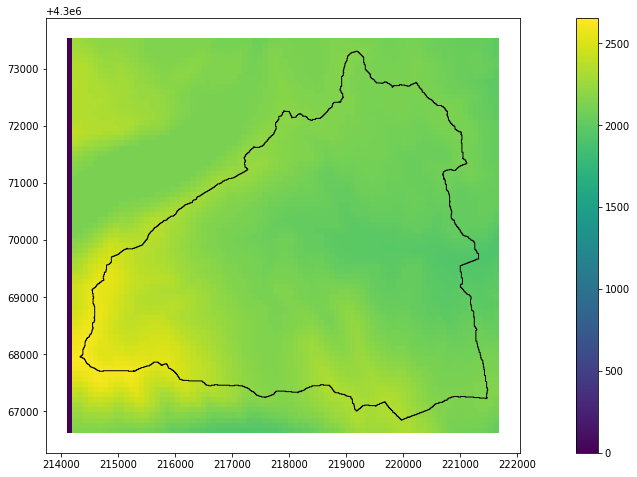

In [8]:
# Plot the resampled grid cell altutudes
fig, ax = plt.subplots(figsize=(20,8))
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
hru_params=geopandas.read_file(fn2)
hru_params.plot(column="DEM_ADJ",ax=ax,legend=True)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()